In [492]:
import re
from patsy import dmatrix
from utils.EDA.analysis import *

In [493]:
# report 확인
def LinearRegR(data, formula):
    model = sm.OLS.from_formula(formula, data)
    result = model.fit()
    print(result.summary())
    return result
    

def plot_pre_tar(result, data, tar):
    predict = result.predict(data).values

    target = data[tar].values
    plt.scatter(target, predict)
    
    return result
    
# 예측치와 추정치 결과 확인 (위치도 출력)
# plot_leverage_resid2, influence_plot 확인
def LinearReg(data, formula):
    model = sm.OLS.from_formula(formula, data)
    result = model.fit()
    
    predict = result.predict(data).values

    y = formula.split("~")[0].strip()
    target = data[y].values
    plt.scatter(target, predict)
    
    return result
    
    
def LinearRegO(data, formula, num_param):
    model = sm.OLS.from_formula(formula, data)
    result = model.fit()
    
    predict = result.predict(data).values

    y = formula.split("~")[0].strip()
    target = data[y].values

#     ax = plt.subplot()
#     plt.scatter(target, predict)
#     cook_d2, pvals = result.get_influence().cooks_distance
#     fox_cr = 4 / (len(y) - num_param)
#     idx = np.where(cook_d2 > fox_cr)[0]
#     plt.scatter(target[idx], predict[idx], s=300, c="r", alpha=0.5)
#     utils.annotate_axes(range(len(idx)), idx, 
#                     list(zip(target[idx], predict[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
    
    
    sm.graphics.influence_plot(result)
    
def LinearRegExo(data, formula, column):
    model = sm.OLS.from_formula(formula, data)
    result = model.fit()
    
    fig = sm.graphics.plot_regress_exog(result, column)
    fig.set_size_inches(10, 10)
# 그래프 보기( 잔차 ) / 컬럼 값이 입력
# plot_regress_exog(fitting plit, residal-x, partial, CCPR)

In [494]:
def makeFormula(target, numeric=None, categoric=None, noInter = False, scale = False):
    formula = ""
    formula += target
    formula += "~"
    
    if(numeric != None):
        if scale == True:
            numeric = list(map(lambda c :  "scale(" + c + ")", numeric))
        formula_numeric = "+".join(numeric)
        formula += formula_numeric 
    
    if(numeric != None and categoric != None):
        formula += "+"
    
    if(categoric != None):
        categoric = list(map(lambda c :  "C(" + c + ")", categoric))
        formula_categoric = "+".join(categoric)
        formula += formula_categoric
    
    if(noInter == True):
        formula +="+0"
    
    return formula

In [543]:
df_train = pd.read_csv("../data/train_no_missing.csv")

# 전처리
# numeric -> categorical
nuTocaList = ["MSSubClass", "MoSold", "YrSold", "OverallQual", "OverallCond"]
df_train[nuTocaList] = df_train[nuTocaList].astype("str")

## 실험 1. Numeric data에서 연관이 깊은 데이터 출력 

In [558]:
numeric_list = []
categoric_list = []

for c in df_train.columns:
    if df_train[c].dtype == "int64" or df_train[c].dtype == "float64":
        numeric_list.append(c)
    else:
        categoric_list.append(c)

# df_train = pd.get_dummies(df_train)
# li_column = [c for c in df_train.columns]
        
numeric_list.remove("log_SalePrice")
numeric_list.remove("Id")

numeric_list

['log_LotFrontage',
 'log_LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'log_1stFlrSF',
 'SecondFlrSF',
 'LowQualFinSF',
 'log_GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ThreeSsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

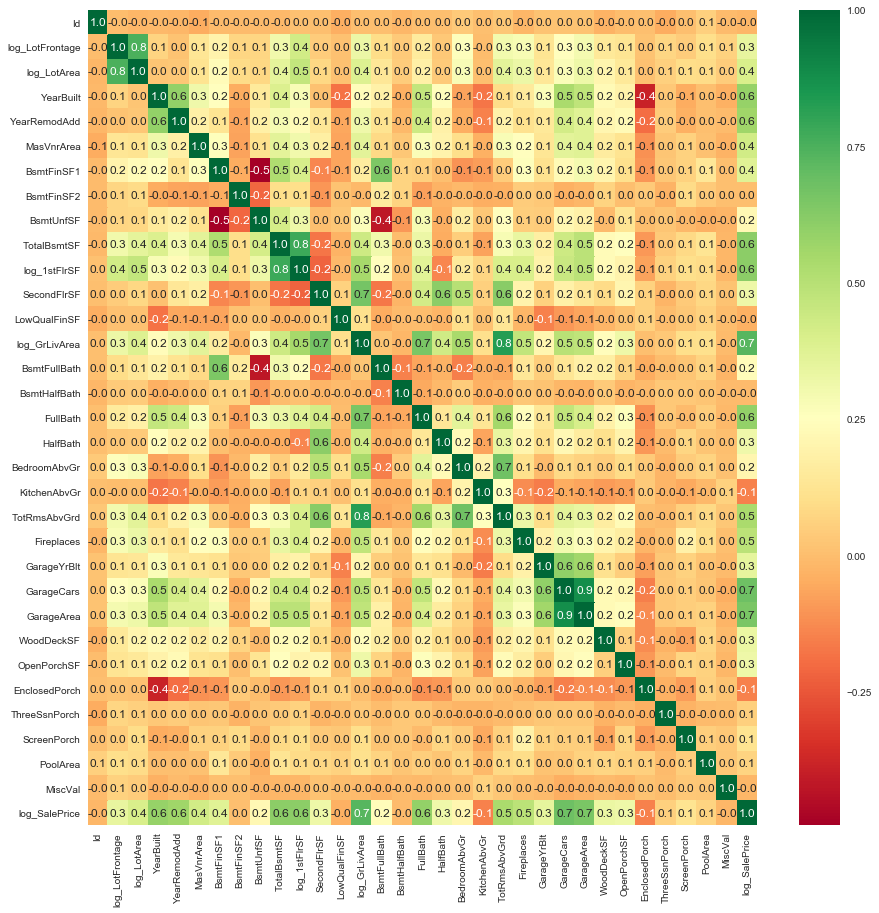

In [545]:
# 상관관계 높은 값 추출
f, ax = plt.subplots(figsize = (15, 15))
data_cor = df_train.corr()
ax = sns.heatmap(data_cor, cmap = "RdYlGn", annot = True, fmt = "1.1f")

In [559]:
numeric_list

['log_LotFrontage',
 'log_LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'log_1stFlrSF',
 'SecondFlrSF',
 'LowQualFinSF',
 'log_GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ThreeSsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [560]:
numeric_list.remove("GarageCars")

In [561]:
get_top_abs_cor(df_train[numeric_list], 15)

log_GrLivArea    TotRmsAbvGrd     0.825498
TotalBsmtSF      log_1stFlrSF     0.779571
log_LotFrontage  log_LotArea      0.754679
BedroomAbvGr     TotRmsAbvGrd     0.676620
SecondFlrSF      log_GrLivArea    0.662904
log_GrLivArea    FullBath         0.653160
BsmtFinSF1       BsmtFullBath     0.649212
SecondFlrSF      TotRmsAbvGrd     0.616423
                 HalfBath         0.609707
YearBuilt        YearRemodAdd     0.592855
GarageYrBlt      GarageArea       0.560783
FullBath         TotRmsAbvGrd     0.554784
log_1stFlrSF     log_GrLivArea    0.545984
log_GrLivArea    BedroomAbvGr     0.538848
BsmtFinSF1       TotalBsmtSF      0.522396
dtype: float64

In [562]:
# Backward method
num_iter = 0
isLoop = True

while(isLoop):
    num_iter += 1
    
    model = sm.OLS.from_formula(makeFormula("log_SalePrice", numeric_list, None, True, False), df_train)
    result = model.fit()
    
    pvalues = result.pvalues
    max_index = pvalues.sort_values(ascending = False).index[0]
    max_value = pvalues.sort_values(ascending = False).values[0]
    
    print("{} 단계 : max_t_value : ({}, {}) \n".format(num_iter, max_index, max_value))

    print("현재 list : ", end = "")
    for c in numeric_list:
        print("{}, ".format(c), end = "")
    print("\n")
    
    if max_value > 0.01:
        numeric_list.remove(max_index)
        isLoop = True
    else:
        isLoop = False

1 단계 : max_t_value : (LowQualFinSF, 0.9695111512842752) 

현재 list : log_LotFrontage, log_LotArea, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, log_1stFlrSF, SecondFlrSF, LowQualFinSF, log_GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, ThreeSsnPorch, ScreenPorch, PoolArea, MiscVal, 

2 단계 : max_t_value : (OpenPorchSF, 0.9621521258079314) 

현재 list : log_LotFrontage, log_LotArea, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, log_1stFlrSF, SecondFlrSF, log_GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, ThreeSsnPorch, ScreenPorch, PoolArea, MiscVal, 

3 단계 : max_t_value : (MiscVal, 0.9001423148724934) 

현재 list : log_LotFrontage, log_LotArea, YearBuilt, Y

In [551]:
numeric_list

['log_LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 'log_1stFlrSF',
 'SecondFlrSF',
 'log_GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea']

# correlation 확인

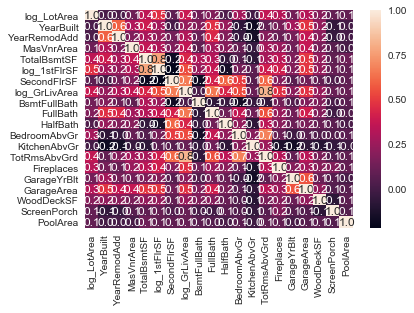

In [563]:
cor_numeric_list = df_train[numeric_list].corr()
sns.heatmap(cor_numeric_list, annot = True, fmt = ".1f")

In [564]:
get_top_abs_cor(df_train[numeric_list], 20)

log_GrLivArea  TotRmsAbvGrd     0.825498
TotalBsmtSF    log_1stFlrSF     0.779571
BedroomAbvGr   TotRmsAbvGrd     0.676620
SecondFlrSF    log_GrLivArea    0.662904
log_GrLivArea  FullBath         0.653160
SecondFlrSF    TotRmsAbvGrd     0.616423
               HalfBath         0.609707
YearBuilt      YearRemodAdd     0.592855
GarageYrBlt    GarageArea       0.560783
FullBath       TotRmsAbvGrd     0.554784
log_1stFlrSF   log_GrLivArea    0.545984
log_GrLivArea  BedroomAbvGr     0.538848
SecondFlrSF    BedroomAbvGr     0.502901
TotalBsmtSF    GarageArea       0.486665
log_1stFlrSF   GarageArea       0.486053
YearBuilt      GarageArea       0.478954
log_GrLivArea  GarageArea       0.476160
               Fireplaces       0.468915
YearBuilt      FullBath         0.468271
log_LotArea    log_1stFlrSF     0.467465
dtype: float64

In [565]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.893e+05
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        15:07:24   Log-Likelihood:                 571.52
No. Observations:                1460   AIC:                            -1103.
Df Residuals:                    1440   BIC:                            -997.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
log_LotArea       0.0546      0.010      5.432      0.000       0.035       0.074
YearBuilt         0.0019      0.000      9.310      0.000       0.002       0.002
YearRemodAdd      0.0023      0.000     10.293      0.000       0.002       0.003
MasVnrArea     7.397e-05   2.78e-05      2.663      0.008    1.95e-05       0.000
TotalBsmtSF       0.0001   1.67e-05      7.285      0.000    8.92e-05       0.000
log_1stFlrSF      0.1988      0.049      4.098      0.000       0.104       0.294
SecondFlrSF       0.0001   3.72e-05      3.616      0.000    6.16e-05       0.000
log_GrLivArea     0.1874      0.057      3.313      0.001       0.076       0.298
BsmtFullBath      0.0619      0.009      6.749      0.000       0.044       0.080
FullBath          0.0785      0.011      6.914      0.000       0.056       0.101
HalfBath          0.0339      0.012      2.782      0.005       0.010       0.058
BedroomAbvGr     -0.0314      0.008     -4.037      0.000      -0.047      -0.016
KitchenAbvGr     -0.2086      0.022     -9.520      0.000      -0.252      -0.166
TotRmsAbvGrd      0.0157      0.006      2.786      0.005       0.005       0.027
Fireplaces        0.0526      0.008      6.354      0.000       0.036       0.069
GarageYrBlt    3.809e-05    1.2e-05      3.182      0.001    1.46e-05    6.16e-05
GarageArea        0.0002    3.1e-05      7.097      0.000       0.000       0.000
WoodDeckSF        0.0001   3.71e-05      3.242      0.001    4.75e-05       0.000
ScreenPorch       0.0003   8.02e-05      3.868      0.000       0.000       0.000
PoolArea         -0.0003      0.000     -3.110      0.002      -0.001      -0.000
==============================================================================
Omnibus:                      880.493   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27320.339
Skew:                          -2.267   Prob(JB):                         0.00
Kurtosis:                      23.701   Cond. No.                     5.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 카테고리 영향력 확인 

In [566]:
# 카테고리와 Numeric 입력후에 test돌려 f-검정이 높은 것 제거
# 카테고리
num_iter = 0

while True:
    num_iter +=1
    model = sm.OLS.from_formula(makeFormula("log_SalePrice", numeric_list, categoric_list, False), data=df_train)
    result = model.fit()
    #     print(result.summary())
    df_anova = sm.stats.anova_lm(result, typ =2)
    remove_li = list(df_anova[df_anova["PR(>F)"] > 0.01].index)
    
    print("{} 차 시도 !!\n".format(num_iter))
    print(df_anova[df_anova["PR(>F)"] > 0.01])
    print()
    
    if len(remove_li) > 0:
        
        # 제거
        for c in remove_li:
            if re.match(r'C\((\w+)\)', c):
                s = re.sub(r"C\((\w+)\)", r"\g<1>", c)
                categoric_list.remove(s)
            else:
                numeric_list.remove(c)
    else:
        break

1 차 시도 !!

                   sum_sq    df         F    PR(>F)
C(MSSubClass)    0.205604  14.0  1.458132  0.119725
C(Street)        0.023964   1.0  2.379354  0.123217
C(Alley)         0.022672   2.0  1.125503  0.324837
C(LotShape)      0.065863   3.0  2.179784  0.088718
C(LandContour)   0.022156   3.0  0.733273  0.532204
C(Utilities)     0.039027   1.0  3.874871  0.049248
C(BldgType)      0.007886   4.0  0.195742  0.940664
C(HouseStyle)    0.091759   7.0  1.301494  0.245931
C(RoofStyle)     0.067819   5.0  1.346708  0.242076
C(Exterior2nd)   0.099550  15.0  0.658938  0.826168
C(MasVnrType)    0.056849   3.0  1.881458  0.130880
C(ExterQual)     0.013312   3.0  0.440560  0.724034
C(ExterCond)     0.067055   4.0  1.664427  0.155903
C(Foundation)    0.116562   5.0  2.314630  0.041805
C(BsmtQual)      0.075255   4.0  1.867968  0.113727
C(BsmtCond)      0.075661   4.0  1.878040  0.111944
C(BsmtFinType2)  0.067359   6.0  1.114657  0.351422
C(HeatingQC)     0.118677   4.0  2.945785  0.019438
C

In [507]:
model = sm.OLS.from_formula(makeFormula("log_SalePrice", numeric_list, categoric_list, False, True), data=df_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     153.9
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        14:34:27   Log-Likelihood:                 1259.7
No. Observations:                1460   AIC:                            -2269.
Df Residuals:                    1335   BIC:                            -1609.
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

# Scale

In [567]:
model = sm.OLS.from_formula(makeFormula("log_SalePrice", numeric_list, categoric_list, True, True), data=df_train)
result = model.fit()

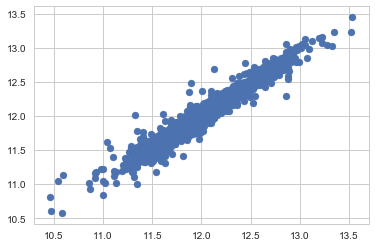

In [568]:
plot_pre_tar(result, df_train, "log_SalePrice")

## 카테고리 쓸때 없는 값 제거

In [510]:
# for c in categoric_list:
#     model = sm.OLS.from_formula(makeFormula("log_SalePrice", numeric_list, [c], True, True), data=df_train)
#     result = model.fit()
    
#     sns.stripplot(x=c, y="log_SalePrice", data=df_train, jitter=True, alpha=.3)
#     sns.pointplot(x=c, y="log_SalePrice", data=df_train, dodge=True, color='r')
#     plt.show()
    
#     print(result.summary())

MSZoning : ?
LotConfig : CulDSac가 그외
LandSlope : 모두 같이 나온다. (삭제)
Neighborhood : 그대로
Condition1 : 그대로
Condition2 : (삭제)
OverallQual : (생각좀;;)
OverallCond : 그대로
Roofmatl : 삭제
Exterior1st : 그대로
BsmtExposure : 그대로
BsmtFinType1 : 그대로
Heating : 삭제
KitchenQual : 그대로
Functional : 그대로 (애매모호)
SaleCondition : 그대로

In [569]:
# 삭제 기준 : t-test를 이용
categoric_list.remove("LandSlope")
categoric_list.remove("RoofMatl")
categoric_list.remove("Heating")
categoric_list.remove("Condition2")

In [512]:
## bin 재설정 (OverallQuality)
# model = sm.OLS.from_formula(makeFormula("log_SalePrice", None, ["OverallQual"], True), data=df_train)
# result = model.fit()
# result.summary()

# #Neighborhood
# df_try = df_train["Neighborhood"]
# df_try = pd.get_dummies(df_try)
# neighbor_list = list(df_try.columns)

# df_try = pd.concat([df_try, df_train], axis = 1)

# try_list = neighbor_list + categoric_list
# try_list.remove("Neighborhood")

# model = sm.OLS.from_formula(makeFormula("log_SalePrice", numeric_list, try_list, False, True), data=df_try)
# result = model.fit()

# result.summary()
# neighborhood_anova = sm.stats.anova_lm(result)

# remove_li = list(neighborhood_anova[neighborhood_anova["PR(>F)"] > 0.01].index)
    
# print(neighborhood_anova[neighborhood_anova["PR(>F)"] > 0.01])
# print()

# # 제거
# for c in remove_li:
#     if re.match(r'C\((\w+)\)', c):
#         s = re.sub(r"C\((\w+)\)", r"\g<1>", c)
#         try_list.remove(s)
#     else:
#         numeric_list.remove(c)


1-2, 9-10

In [577]:
a = makeFormula("log_SalePrice", numeric_list, categoric_list, False, True) + "+ C(OverallQual):C(OverallCond)"
print(a)
model = sm.OLS.from_formula(a, data=df_train)
result = model.fit()
print(result.summary())

log_SalePrice~scale(log_LotArea)+scale(YearBuilt)+scale(YearRemodAdd)+scale(TotalBsmtSF)+scale(log_GrLivArea)+scale(BsmtFullBath)+scale(GarageArea)+scale(WoodDeckSF)+scale(ScreenPorch)+C(MSZoning)+C(LotConfig)+C(Neighborhood)+C(Condition1)+C(OverallQual)+C(OverallCond)+C(Exterior1st)+C(BsmtExposure)+C(BsmtFinType1)+C(KitchenQual)+C(Functional)+C(SaleCondition)+ C(OverallQual):C(OverallCond)
                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     113.9
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        15:10:05   Log-Likelihood:                 1130.1
No. Observations:                1460   AIC:                            -1984.
Df Residuals:                    1322   BIC:         

C:\Users\magenta_jy\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\magenta_jy\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\magenta_jy\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\magenta_jy\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


## Outlier 제거

<Container object of 3 artists>

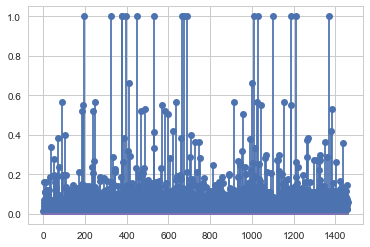

In [578]:
# 레버리지 확인
inf = result.get_influence()
hat = inf.hat_matrix_diag
plt.stem(hat)

<Container object of 3 artists>

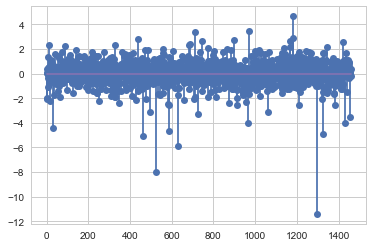

In [579]:
# 잔차 확인
plt.stem(result.resid_pearson)

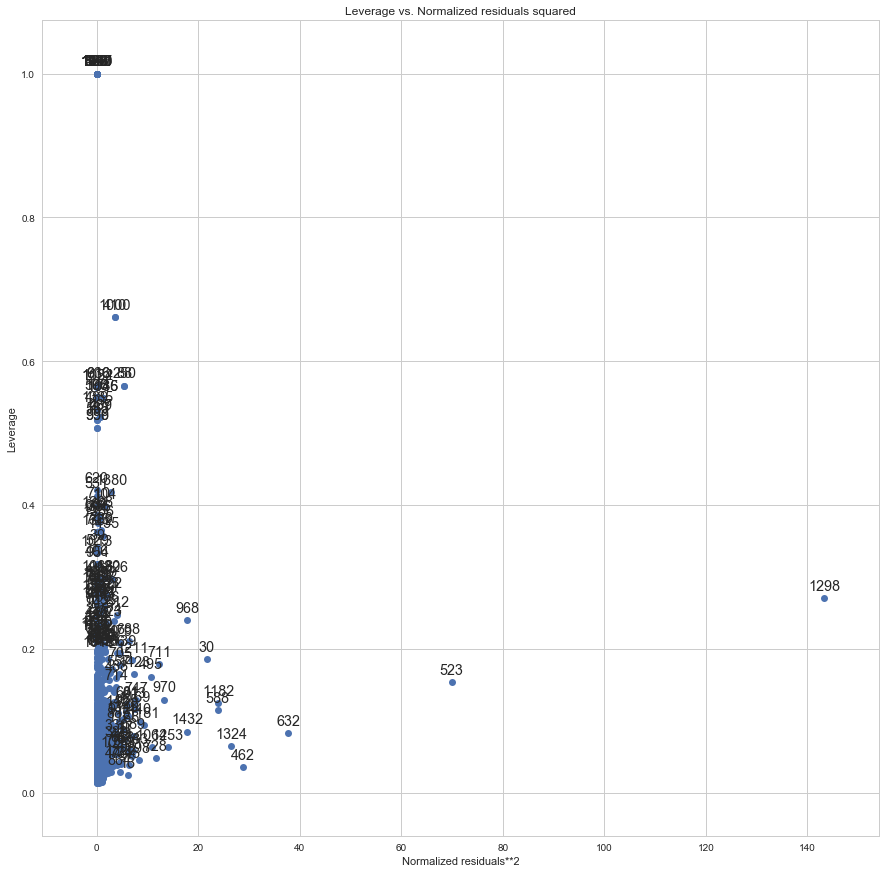

In [580]:
f, ax = plt.subplots(figsize = (15, 15))
sm.graphics.plot_leverage_resid2(result, ax =ax)
plt.show()

# 최종 결과 확인

In [581]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     113.9
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        15:10:35   Log-Likelihood:                 1130.1
No. Observations:                1460   AIC:                            -1984.
Df Residuals:                    1322   BIC:                            -1255.
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   11.4766      0.138     82.907      0.000      11.205      11.748
C(MSZoning)[T.RH]                           -0.0126      0.045     -0.279      0.780      -0.101       0.076
C(MSZoning)[T.RL]                           -0.0047      0.032     -0.147      0.883      -0.067       0.058
C(MSZoning)[T.RM]                           -0.0299      0.036     -0.833      0.405      -0.100       0.040
C(MSZoning)[T.all]                          -0.3791      0.058     -6.546      0.000      -0.493      -0.265
C(LotConfig)[T.CulDSac]                      0.0318      0.015      2.071      0.039       0.002       0.062
C(LotConfig)[T.FR2]                         -0.0329      0.020     -1.677      0.094      -0.071       0.006
C(LotConfig)[T.FR3]                         -0.0918      0.062     -1.474      0.141      -0.214       0.030
C(LotConfig)[T.Inside]                      -0.0087      0.009     -1.009      0.313      -0.026       0.008
C(Neighborhood)[T.Blueste]                  -0.0888      0.093     -0.959      0.338      -0.270       0.093
C(Neighborhood)[T.BrDale]                   -0.1290      0.048     -2.691      0.007      -0.223      -0.035
C(Neighborhood)[T.BrkSide]                  -0.0165      0.041     -0.406      0.685      -0.096       0.063
C(Neighborhood)[T.ClearCr]                  -0.0111      0.042     -0.263      0.793      -0.094       0.072
C(Neighborhood)[T.CollgCr]                  -0.0524      0.032     -1.614      0.107      -0.116       0.011
C(Neighborhood)[T.Crawfor]                   0.0769      0.039      1.968      0.049       0.000       0.154
C(Neighborhood)[T.Edwards]                  -0.1438      0.036     -3.985      0.000      -0.215      -0.073
C(Neighborhood)[T.Gilbert]                  -0.0467      0.035     -1.332      0.183      -0.115       0.022
C(Neighborhood)[T.IDOTRR]                   -0.1136      0.047     -2.438      0.015      -0.205      -0.022
C(Neighborhood)[T.MeadowV]                  -0.2067      0.051     -4.018      0.000      -0.308      -0.106
C(Neighborhood)[T.Mitchel]                  -0.0982      0.037     -2.638      0.008      -0.171      -0.025
C(Neighborhood)[T.NAmes]                    -0.0682      0.035     -1.968      0.049      -0.136      -0.000
C(Neighborhood)[T.NPkVill]                  -0.0345      0.053     -0.649      0.516      -0.139       0.070
C(Neighborhood)[T.NWAmes]                   -0.0726      0.037     -1.983      0.048      -0.144      -0.001
C(Neighborhood)[T.NoRidge]                   0.0805      0.038      2.112      0.035       0.006       0.155
C(Neighborhood)[T.NridgHt]                   0.0619      0.034      1.797      0.073      -0.006       0.130
C(Neighborhood)[T.OldTown]     

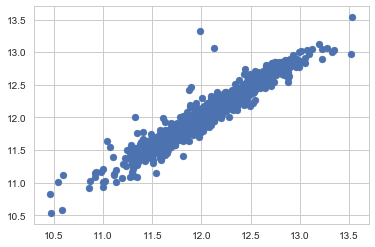

In [582]:
plot_pre_tar(result, df_train, "log_SalePrice")

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([-1.3360762 , -0.93307145, -0.68495629, ...,  0.39256626,
          0.40642973,  0.54609945])),
 (0.10417008930171112, -9.9265085996596356e-15, 0.93169709402050394))

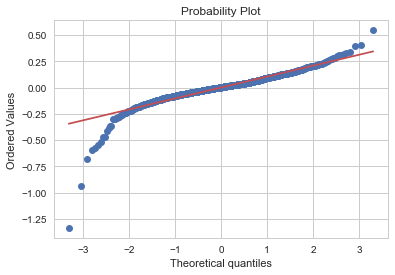

In [583]:
# 잔차의 정규성 확인
sp.stats.probplot(result.resid, plot =plt)

# Test

In [584]:
print(numeric_list)
print(categoric_list)

['log_LotArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'log_GrLivArea', 'BsmtFullBath', 'GarageArea', 'WoodDeckSF', 'ScreenPorch']
['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'OverallQual', 'OverallCond', 'Exterior1st', 'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'Functional', 'SaleCondition']


In [585]:
##Test
df_test = pd.read_csv("../data/test_no_missing.csv")

# 전처리
# numeric -> categorical
df_test[nuTocaList] = df_test[nuTocaList].astype("str")

# # neighborhood 실험
# df_try = df_test["Neighborhood"]
# df_try = pd.get_dummies(df_try)
# df_try = pd.concat([df_try, df_test], axis = 1)

# 계산
y = result.predict(df_test)
y = np.exp(y)

# sumit 만들기
df_sumit = pd.DataFrame(columns = ["Id", "SalePrice"])
df_sumit["Id"] =df_test["Id"]
df_sumit["SalePrice"] = y

df_sumit.to_csv("../submit/submit.csv", index = False)

# Cross Validation

In [609]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import patsy

In [674]:
def crossValidation(data, formula, split_num = 10,debug = False):
    rmsd_sum = 0
    num_iter=0
    
    for idx in range(split_num):
        df_Y, df_X = patsy.dmatrices(formula, data=data, return_type='dataframe')
        df_cv_train_Y, df_cv_test_Y, df_cv_train_X, df_cv_test_X = train_test_split(df_Y, df_X, test_size=len(df_train)//split_num)

        model = sm.OLS(df_cv_train_Y, df_cv_train_X)
        result = model.fit()
        result.summary()

        predict = result.predict(df_cv_test_X).values[:, np.newaxis]
        target = df_cv_test_Y.values

        square_y = (predict - target) ** 2
        rmsd = np.sqrt(square_y.sum() / len(df_cv_test_Y))
        
        if debug == True:
            print("{}차 시도!!!".format(num_iter+1))
            print("rmsd : ", rmsd)
            print()

        rmsd_sum += rmsd
        num_iter +=1
    
    print()
    rmsd_avr = rmsd_sum / split_num
    print("rmsd_avr : ", rmsd_avr)

In [676]:
crossValidation(df_train, makeFormula("log_SalePrice", numeric_list, categoric_list, False, True), 10)


rmsd_avr :  0.133108793236
